In [1]:
import numpy as np
import tensorflow as tf

In [2]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)

In [3]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [4]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype='float32'),
                     np.ones((num_samples_per_class, 1), dtype='float32')))

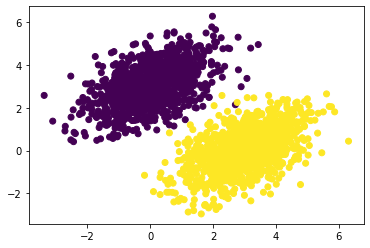

In [5]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [6]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

Here’s our forward pass function:
Because our linear classifier operates on 2D inputs, W is really just two scalar coefficients, w1 and w2: W = [[w1], [w2]]. Meanwhile, b is a single scalar coefficient. As such, for given input point [x, y], its prediction value is: prediction = [[w1], [w2]] • [x, y] + b = w1 * x + w2 * y + b.

In [7]:
def model(inputs):
    return tf.matmul(inputs, W) + b

Here’s our loss function:

In [8]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    #Computes the mean of elements across dimensions of a tensor.
    return tf.reduce_mean(per_sample_losses)

In [9]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [10]:
for step in range(20):
    loss = training_step(inputs, targets)
    print('Loss at step %d: %.4f' % (step, loss))

Loss at step 0: 2.2839
Loss at step 1: 0.2208
Loss at step 2: 0.1180
Loss at step 3: 0.0976
Loss at step 4: 0.0896
Loss at step 5: 0.0838
Loss at step 6: 0.0787
Loss at step 7: 0.0740
Loss at step 8: 0.0698
Loss at step 9: 0.0659
Loss at step 10: 0.0624
Loss at step 11: 0.0592
Loss at step 12: 0.0562
Loss at step 13: 0.0535
Loss at step 14: 0.0510
Loss at step 15: 0.0487
Loss at step 16: 0.0467
Loss at step 17: 0.0448
Loss at step 18: 0.0430
Loss at step 19: 0.0414


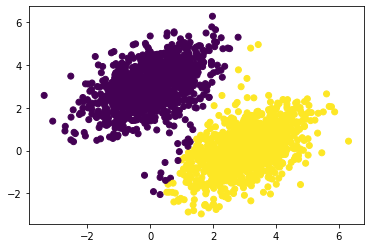

In [11]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

Recall that the prediction value for a given point [x, y] is simply prediction == [[w1], [w2]] • [x, y] + b == w1 * x + w2 * y + b. Thus, class "0" is defined as: w1 * x + w2 * y + b < 0.5 and class "1" is defined as: w1 * x + w2 * y + b > 0.5. You’ll notice that what you’re looking at is really the equation of a line in the 2D plane: w1 * x + w2 * y + b = 0.5. Above the line, class 1, below the line, class 0. You may be used to seeing line equations in the format y = a * x + b; in the same format, our line becomes: y = - w1 / w2 * x + (0.5 - b) / w2.

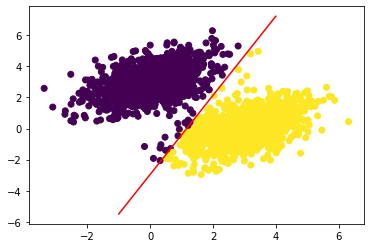

In [12]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, '-r')
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)